# 연예인 닮은꼴 인공지능 만들기

## GPU 사용 방법

훈련 속도가 엄청 빨라져요!

상단메뉴 - 런타임 - 런타임 유형 변경 - 하드웨어 가속기 - GPU - 저장



## 그래프에서 한글 사용을 위한 준비

Matplotlib 패키지가 한글을 지원하지 않기 때문에 사전 실행 필요 (매번 Colab 접속할 때마다 실행 필요)

In [ ]:
!apt-get install fonts-nanum -qq -y
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
exit() # 런타임 다시 시작

Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detec

### 한글 폰트 적용 및 테스트

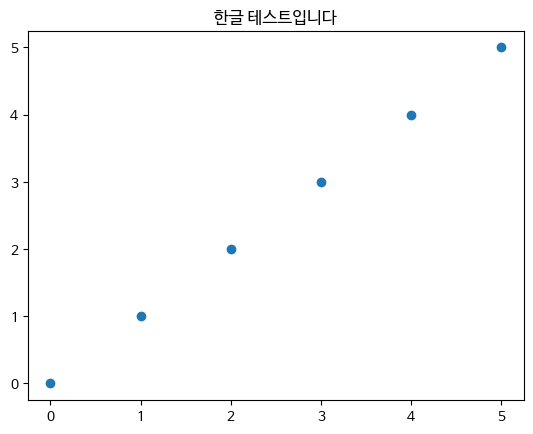

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('한글 테스트입니다')
plt.show()

## 연예인 사진 수집하기

- [jmd_imagescraper](https://joedockrill.github.io/jmd_imagescraper/) 사용

> [DuckDuckGo](https://duckduckgo.com/) 검색 엔진에서 이미지를 크롤링할 수 있게 도와주는 패키지

### 패키지 설치

In [ ]:
!pip install -q jmd_imagescraper

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


### 패키지 로드

In [ ]:
from jmd_imagescraper.core import *
from jmd_imagescraper.imagecleaner import *

### 이미지 수집

- path: 저장 상위 폴더
- label: 저장 하위 폴더 이름
- keywords: 검색 키워드
- max_results: 수집할 사진 개수

In [ ]:
path = 'images' # 저장 상위 폴더
label = '정우성' # 저장 하위 폴더 이름
keywords = '정우성' # 검색 키워드
max_results = 50 # 수집할 사진 개수

image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

Duckduckgo search: 정우성


### 이미지 수집2

- 정우성
- 송중기
- 강호동
- 곽동연

In [ ]:
path = 'images' # 저장 상위 폴더
label = '송중기' # 저장 하위 폴더 이름
keywords = '송중기' # 검색 키워드
max_results = 50 # 수집할 사진 개수

image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

Duckduckgo search: 송중기


In [ ]:
path = 'images' # 저장 상위 폴더
label = '강호동' # 저장 하위 폴더 이름
keywords = '강호동' # 검색 키워드
max_results = 50 # 수집할 사진 개수

image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

Duckduckgo search: 강호동


In [ ]:
path = 'images' # 저장 상위 폴더
label = '곽동연' # 저장 하위 폴더 이름
keywords = '곽동연' # 검색 키워드
max_results = 50 # 수집할 사진 개수

image_list = duckduckgo_search(
    path=path,
    label=label,
    keywords=keywords,
    max_results=max_results
)

Duckduckgo search: 곽동연


### 필요없는 이미지 삭제

In [ ]:
display_image_cleaner('images')

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

### 압축 및 다운로드

In [ ]:
!zip -q -r 'images.zip' images

from google.colab import files
files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## FastAI

### 데이터 로드

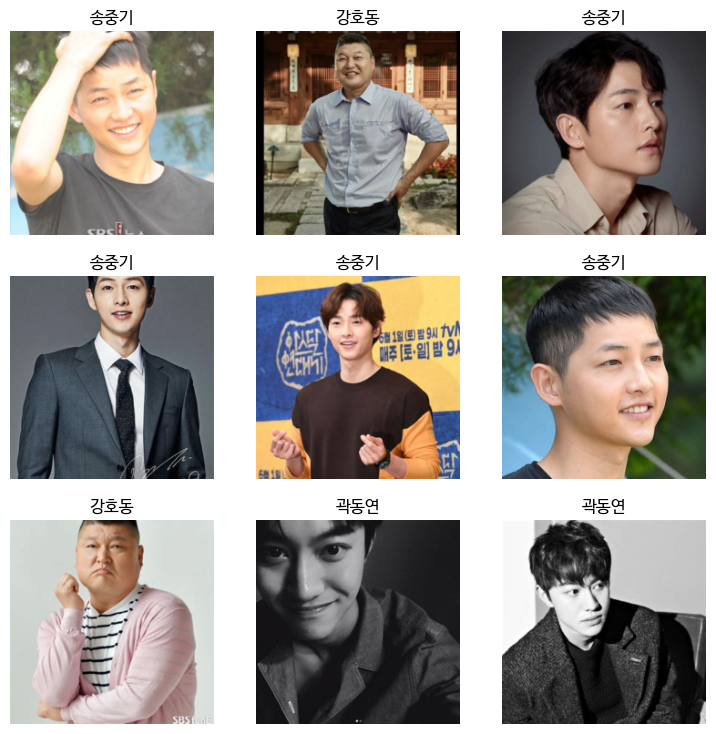

In [ ]:
from fastai.vision.all import *

path = 'images'

block = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms = Resize(224),
)

loader = block.dataloaders(path)

loader.show_batch()

### 데이터에 어떤 인물들이 있는지 확인

In [ ]:
loader.train.vocab

['강호동', '곽동연', '송중기', '정우성']

### 훈련/검증 데이터 확인

In [ ]:
len(loader.train.items)

138

In [ ]:
len(loader.valid.items)

34

### 데이터를 나누는 이유

![](https://i.imgur.com/TztMZdo.png)

- 훈련, train : 교과서
- 검증, valid : 모의고사
- 시험, test : 수능

### 모델 정의 및 훈련

#### 파인튜닝 (Fine-tune)

![](https://i.imgur.com/HdLUJ9o.png)

- vision_learner : 컴퓨터 비전을 위한 학습 도구
- resnet34 : 사전 학습된 인공지능 모델 (resnet34, resnet50)
  - 사용할 수 있는 사전 학습 모델 종류
    - PyTorch : https://pytorch.org/vision/main/models/resnet.html
    - fastai : https://docs.fast.ai/vision.models.xresnet.html
- accuracy : 정확도 (0~1)

- fine_tune : 파인튜닝, 사전 학습 모델을 활용하여 새로운 문제를 해결하는 방법
- epochs : 반복 학습 수

자세한 내용 : https://docs.fast.ai/callback.schedule.html#learner.fine_tune

### 정확도

정확도(Accuracy)는 전체 샘플의 개수들 중에서 얼마나 나의 알고리즘이 정답이라고 예측한 샘플이 포함되었는지의 비율을 의미한다. 예를 들어서, 내 알고리즘이 90% 정확하다면, 100개의 샘플들 중에서 90개만 정확하게 분류하는 것이다.

![](https://i.imgur.com/Bv5yCRC.png)

> 출처: https://m.blog.naver.com/sw4r/221681221173

In [ ]:
learn = vision_learner(loader, resnet34, metrics=accuracy)

learn.fine_tune(epochs = 10)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 216MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.187252,2.283380,0.411765,00:09


epoch,train_loss,valid_loss,accuracy,time
0,1.957888,2.008596,0.470588,00:02
1,1.696333,1.792631,0.500000,00:02
2,1.359729,1.543782,0.529412,00:01
3,1.092393,1.339607,0.588235,00:01
4,0.901294,1.220074,0.647059,00:01
5,0.758055,1.148351,0.676471,00:01
6,0.649085,1.106720,0.705882,00:01
7,0.559786,1.084265,0.705882,00:02
8,0.492239,1.091973,0.676471,00:02
9,0.439333,1.104481,0.676471,00:01


### 훈련 결과

- 위 : 정답
- 아래 : 우리가 훈련시킨 모델의 예측 결과

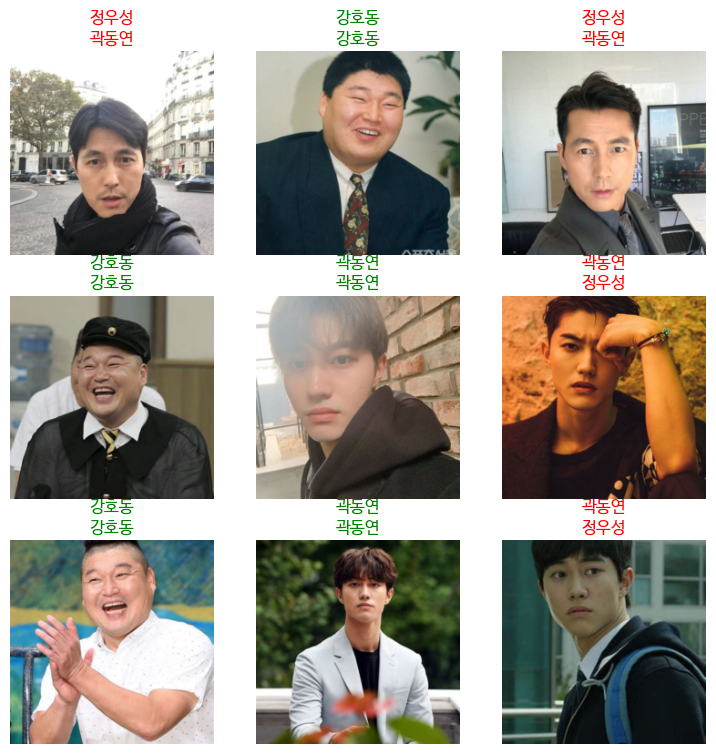

In [ ]:
learn.show_results()

### 훈련된 모델 저장

In [ ]:
from google.colab import files

learn.export('연예인닮은꼴.pkl') # 훈련된 모델 저장 (나중에 다시 쓸 수 있도록!)
# files.download('연예인닮은꼴.pkl') # 모델 다운로드

### 훈련된 모델 로드

훈련된 모델 파일을 가지고 있으면 앞으로는 앞의 훈련 과정이 필요없습니다.

In [ ]:
from fastai.vision.all import *

learn = load_learner('연예인닮은꼴.pkl') # 훈련된 모델 로드

## 새로운 이미지로 테스트

1. 파일 브라우저에서 `test` 폴더 만들기
2. 인터넷에서 이미지 다운로드 받아서(또는 내 사진을) `test` 폴더에 업로드하기

In [ ]:
test_images = get_image_files('test')

test_images

(#1) [Path('test/test_images.jpg')]

### 새로운 이미지 테스트하기

In [ ]:
pred = learn.predict(test_images[0])

pred

('송중기', tensor(2), tensor([0.0039, 0.0420, 0.9138, 0.0403]))

### 예측 결과 살펴보기

In [ ]:
pred[0]

'송중기'

In [ ]:
pred[1]

tensor(2)

['강호동', '곽동연', '송중기', '정우성']

In [ ]:
pred[2]

tensor([0.0039, 0.0420, 0.9138, 0.0403])

In [ ]:
max(pred[2])

tensor(0.9138)

In [ ]:
max(pred[2]) * 100

tensor(91.3817)